In [3]:
# IMPORT LIBS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# IMPORT DATA

data = pd.read_csv('https://raw.githubusercontent.com/rajatg64/Iris-Flowers-Classification-ML-Project/master/iris.data.csv', header = None)
data = data.rename(columns = {0:'Sepal_len', 1:'Sepal_wid', 2:'Petal_len', 3:'Petal_wid', 4:'Species'})
data.head()

,Sepal_len,Sepal_wid,Petal_len,Petal_wid,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# OVERVIEW OF DATA

data.describe()    

,Sepal_len,Sepal_wid,Petal_len,Petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
# GRAPH THEMES

sns.set_style('white')

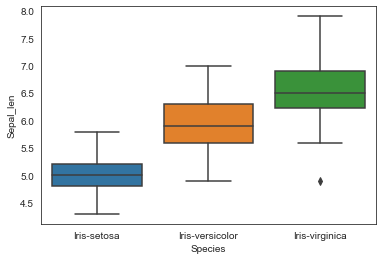

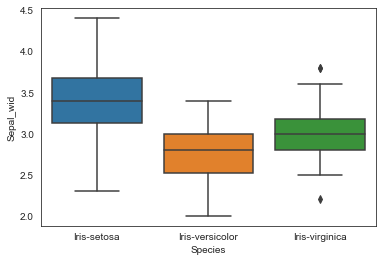

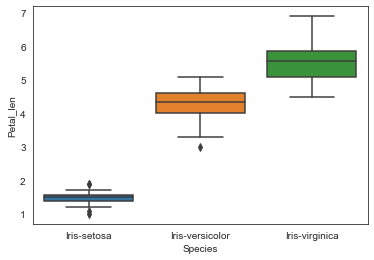

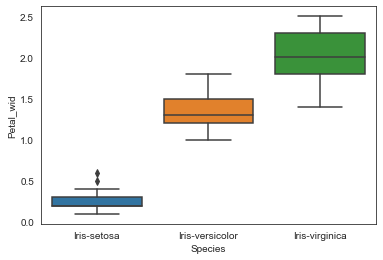

In [28]:
# VISUALIZE DATA (BOXPLOT)

column_Names = data.columns

Ind_Var_Names = []

for i in range(len(column_Names)-1):
    x = column_Names[i]
    Ind_Var_Names.append(x)

for i in Ind_Var_Names:
    plt.figure()
    sns.boxplot(data=data, x = 'Species', y = i )

<AxesSubplot:>

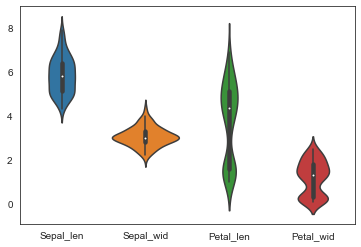

In [30]:
# VIOLIN PLOT

sns.violinplot(data=data)

In [75]:
# SPLIT DATA INTO X & Y

X = data.iloc[:,0:4]

y = data['Species']




In [76]:
# IMPORT TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

In [77]:
# SPLIT DATA

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=10)

print(X_train.shape,y_train.shape)

(120, 4) (120,)


In [78]:
# IMPORT KNN PACKAGE

from sklearn.neighbors import KNeighborsClassifier

In [79]:
# IMPORT EVALUATION LIBRARY

from sklearn import metrics



In [141]:
# RUN 25 ITERATIONS TO TEST ACCURACY

k_range = range(1,26)
score_dict = {}
score_list = []

for i in k_range:
    # create model
    KNN = KNeighborsClassifier(n_neighbors=i)
    # Fit Model
    KNN.fit(X_train,y_train)
    # run model on Test X data
    prediction = KNN.predict(X_test)
    # check the accuracy -- dictionary
    score_dict[i] = metrics.accuracy_score(y_test,prediction)
    # add to list
    score_list.append(metrics.accuracy_score(y_test,prediction))

In [142]:
# find avg. accuracy
Average = round(sum(score_list)/len(score_list),4)
print(Average*100,"%")

98.27 %


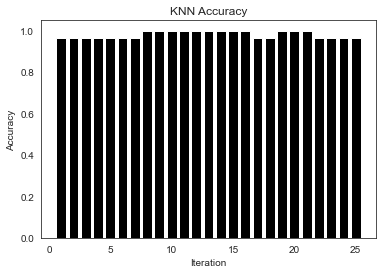

In [111]:
# PLOT ACCURACY


plt.bar(k_range,score_list, color = 'k')
plt.title("KNN Accuracy")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

In [118]:
# SCORE USING SCORE MODULE
round(KNN.score(X_test,y_test),4)*100



96.67

In [140]:
# MAKE PREDICTIONS

n = 5


KNN = KNeighborsClassifier(n_neighbors=n)
KNN.fit(X_train,y_train)
pred_array = [[2,5,3,4],
                [3,4,5,3]]
pred = KNN.predict(pred_array)

print(pred[0],pred[1],sep='\n')



Iris-versicolor
Iris-virginica
